In [1]:
pip install cfbd --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cfbd
import re
from datetime import datetime

In [3]:
with open('keys/keys.json') as fi:
    credentials = json.load(fi)

In [4]:
api_key = credentials['api_key']

In [5]:
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = api_key
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_config = cfbd.ApiClient(configuration)

In [6]:
lines = pd.concat( 
    map(pd.read_csv, ['lines_data\lines_2018.csv', 'lines_data\lines_2019.csv', 'lines_data\lines_2020.csv', 'lines_data\lines_2021.csv', 'lines_data\lines_2022.csv']), ignore_index=True)

In [7]:
lines = lines.drop('Unnamed: 0', axis=1)

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
fbs = ['FBS Independents', 'Conference USA', 'Mountain West','American Athletic', 'Mid-American', 'SEC', 'Pac-12', 'Big Ten',
       'ACC', 'Big 12', 'Sun Belt']

In [10]:
fcs = ['AWC', 'Atlantic Sun', 'Southern',
       'SWAC', 'MVFC', 'OVC', 'Big South', 'CAA', 'NEC',
       'Western Athletic', 'Big Sky', 'MEAC', 'Southland', 'Patriot',
       'Ivy', 'Pioneer']

In [11]:
p5 = ['SEC', 'Pac-12', 'Big Ten', 'ACC', 'Big 12']

In [12]:
g5 = ['Conference USA', 'Mountain West','American Athletic', 'Mid-American', 'Sun Belt']

In [13]:
lines = lines.drop(['covering_team'], axis=1)

In [14]:
lines = lines.dropna()

In [15]:
lines

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error
0,401013357,2018,1,regular,2018-08-25,UMass,FBS Independents,63.0,Duquesne,NEC,15.0,UMass -21,-21.0,-48.0,27.0,21.0,48.0,-27.0,27.0
1,401014972,2018,1,regular,2018-08-25,Rice,Conference USA,31.0,Prairie View,SWAC,28.0,Rice -22.5,-22.5,-3.0,-19.5,22.5,3.0,19.5,19.5
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,26.0
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,16.5
4,401020671,2018,1,regular,2018-08-30,Ball State,Mid-American,42.0,Central Connecticut,NEC,6.0,Ball State -19.5,-19.5,-36.0,16.5,19.5,36.0,-16.5,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,12.5
4180,401437132,2022,14,regular,2022-12-03,Jackson State,SWAC,43.0,Southern,SWAC,24.0,Jackson State -20.5,-20.5,-19.0,-1.5,20.5,19.0,1.5,1.5
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,21.5
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,5.0


In [16]:
# % of time vegas hits the spread exactly
((len(lines) - len(lines[lines['vegas_error']==0]))/len(lines)-1)*-1*100

1.6977522716403626

In [17]:
teams = []
for x in lines.iterrows():
    if x[1]['home_diff'] == 0:
        teams.append("Push")
    elif x[1]['home_diff'] < 0:
        teams.append(x[1]['away_team'])
    elif x[1]['home_diff'] > 0:
        teams.append(x[1]['home_team'])

In [18]:
lines['covering_team'] = teams

In [19]:
lines

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error,covering_team
0,401013357,2018,1,regular,2018-08-25,UMass,FBS Independents,63.0,Duquesne,NEC,15.0,UMass -21,-21.0,-48.0,27.0,21.0,48.0,-27.0,27.0,UMass
1,401014972,2018,1,regular,2018-08-25,Rice,Conference USA,31.0,Prairie View,SWAC,28.0,Rice -22.5,-22.5,-3.0,-19.5,22.5,3.0,19.5,19.5,Prairie View
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,26.0,Hawai'i
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,16.5,UCF
4,401020671,2018,1,regular,2018-08-30,Ball State,Mid-American,42.0,Central Connecticut,NEC,6.0,Ball State -19.5,-19.5,-36.0,16.5,19.5,36.0,-16.5,16.5,Ball State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,12.5,Troy
4180,401437132,2022,14,regular,2022-12-03,Jackson State,SWAC,43.0,Southern,SWAC,24.0,Jackson State -20.5,-20.5,-19.0,-1.5,20.5,19.0,1.5,1.5,Southern
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,21.5,Clemson
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,5.0,Michigan


In [20]:
game_winner = []
for x in lines.iterrows():
    if x[1]['home_score'] > x[1]['away_score']:
        game_winner.append(x[1]['home_team'])
    else:
        game_winner.append(x[1]['away_team'])

In [21]:
lines['game_winner'] = game_winner

In [22]:
favorite = []
for x in lines.iterrows():
    if x[1]['away_spread'] > x[1]['home_spread']:
        favorite.append(x[1]['home_team'])
    else:
        favorite.append(x[1]['away_team'])

In [23]:
lines['favorite'] = favorite

In [24]:
underdog = []
for x in lines.iterrows():
    if x[1]['away_spread'] < x[1]['home_spread']:
        underdog.append(x[1]['home_team'])
    else:
        underdog.append(x[1]['away_team'])

In [25]:
lines['underdog'] = underdog

In [26]:
accuracy = []
for x in lines.iterrows():
    if (x[1]['vegas_error'] <=7):
        accuracy.append('Prediction within 7')
    elif (x[1]['vegas_error'] <=14):
        accuracy.append('Prediction within 14')
    else:
        accuracy.append('Prediction outside 14')

In [27]:
lines['accuracy'] = accuracy

In [28]:
#how 
accuracy_pie = lines['accuracy'].value_counts(normalize=True)
accuracy_pie

Prediction within 7      0.363462
Prediction outside 14    0.354615
Prediction within 14     0.281923
Name: accuracy, dtype: float64

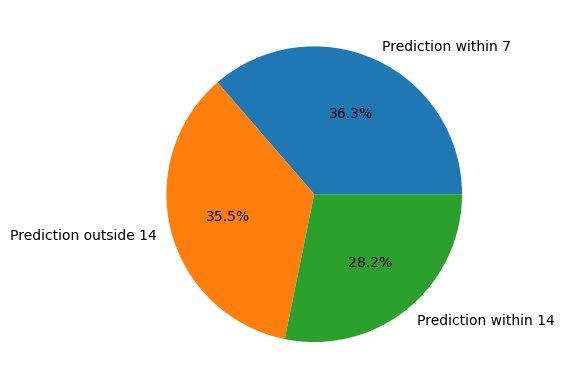

In [29]:
names = ['Prediction within 7','Prediction outside 14', 'Prediction within 14']
plt.pie(accuracy_pie, labels=names, autopct='%1.1f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

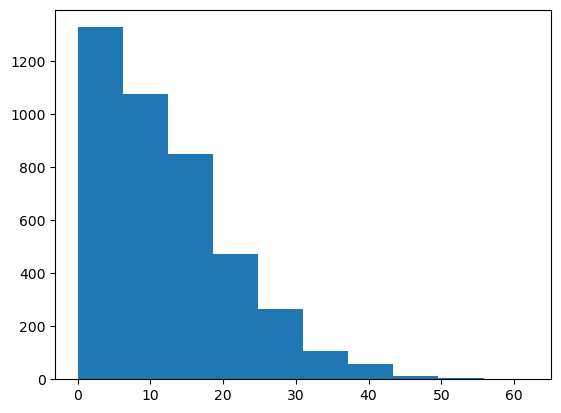

In [30]:
plt.hist(lines['vegas_error'])
plt.show

In [31]:
lines

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error,covering_team,game_winner,favorite,underdog,accuracy
0,401013357,2018,1,regular,2018-08-25,UMass,FBS Independents,63.0,Duquesne,NEC,15.0,UMass -21,-21.0,-48.0,27.0,21.0,48.0,-27.0,27.0,UMass,UMass,UMass,Duquesne,Prediction outside 14
1,401014972,2018,1,regular,2018-08-25,Rice,Conference USA,31.0,Prairie View,SWAC,28.0,Rice -22.5,-22.5,-3.0,-19.5,22.5,3.0,19.5,19.5,Prairie View,Rice,Rice,Prairie View,Prediction outside 14
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,26.0,Hawai'i,Hawai'i,Colorado State,Hawai'i,Prediction outside 14
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,16.5,UCF,UCF,UCF,Connecticut,Prediction outside 14
4,401020671,2018,1,regular,2018-08-30,Ball State,Mid-American,42.0,Central Connecticut,NEC,6.0,Ball State -19.5,-19.5,-36.0,16.5,19.5,36.0,-16.5,16.5,Ball State,Ball State,Ball State,Central Connecticut,Prediction outside 14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,12.5,Troy,Troy,Troy,Coastal Carolina,Prediction within 14
4180,401437132,2022,14,regular,2022-12-03,Jackson State,SWAC,43.0,Southern,SWAC,24.0,Jackson State -20.5,-20.5,-19.0,-1.5,20.5,19.0,1.5,1.5,Southern,Jackson State,Jackson State,Southern,Prediction within 7
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,21.5,Clemson,Clemson,Clemson,North Carolina,Prediction outside 14
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,5.0,Michigan,Michigan,Michigan,Purdue,Prediction within 7


In [32]:
prediction = []
for x in lines.iterrows():
    if x[1]['game_winner'] == x[1]['favorite']:
        prediction.append('Yes')
    else:
        prediction.append('No')

In [33]:
lines['correct_predict'] = prediction

In [34]:
lines['correct_predict'].value_counts(normalize=True)

Yes    0.761597
No     0.238403
Name: correct_predict, dtype: float64

In [35]:
# & of the time a home favorite covers the spread
(len(lines[(lines['home_team'] == lines['favorite'])&(lines['home_team'] == lines['covering_team'])])) / len(lines)*100

30.942132950741275

In [36]:
lines_fbs = lines[(lines['home_conference'].isin(fbs))&(lines['away_conference'].isin(fbs))]

In [37]:
lines_fbs

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error,covering_team,game_winner,favorite,underdog,accuracy,correct_predict
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,26.0,Hawai'i,Hawai'i,Colorado State,Hawai'i,Prediction outside 14,No
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,16.5,UCF,UCF,UCF,Connecticut,Prediction outside 14,Yes
7,401012880,2018,1,regular,2018-08-31,Michigan State,Big Ten,38.0,Utah State,Mountain West,31.0,Michigan State -23.5,-23.5,-7.0,-16.5,23.5,7.0,16.5,16.5,Utah State,Michigan State,Michigan State,Utah State,Prediction outside 14,Yes
8,401013086,2018,1,regular,2018-08-31,Tulane,American Athletic,17.0,Wake Forest,ACC,23.0,Wake Forest -7.5,7.5,6.0,1.5,-7.5,-6.0,-1.5,1.5,Tulane,Wake Forest,Wake Forest,Tulane,Prediction within 7,Yes
9,401013089,2018,1,regular,2018-08-31,Duke,ACC,34.0,Army,FBS Independents,14.0,Duke -14,-14.0,-20.0,6.0,14.0,20.0,-6.0,6.0,Duke,Duke,Duke,Army,Prediction within 7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,401437036,2022,14,regular,2022-12-03,Georgia,SEC,50.0,LSU,SEC,30.0,Georgia -17.5,-17.5,-20.0,2.5,17.5,20.0,-2.5,2.5,Georgia,Georgia,Georgia,LSU,Prediction within 7,Yes
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,12.5,Troy,Troy,Troy,Coastal Carolina,Prediction within 14,Yes
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,21.5,Clemson,Clemson,Clemson,North Carolina,Prediction outside 14,Yes
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,5.0,Michigan,Michigan,Michigan,Purdue,Prediction within 7,Yes


In [38]:
# % of time vegas hits the spread exactly
((len(lines_fbs) - len(lines_fbs[lines_fbs['vegas_error']==0]))/len(lines_fbs)-1)*-1*100

1.6939078751857406

In [42]:
lines_fbs[lines_fbs['covering_team'] == 'Push']

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error,covering_team,game_winner,favorite,underdog,accuracy,correct_predict
30,401012684,2018,1,regular,2018-09-01,California,Pac-12,24.0,North Carolina,ACC,17.0,California -7,-7.0,-7.0,0.0,7.0,7.0,-0.0,0.0,Push,California,California,North Carolina,Prediction within 7,Yes
72,401012681,2018,1,regular,2018-09-02,Oregon,Pac-12,58.0,Bowling Green,Mid-American,24.0,Oregon -34,-34.0,-34.0,0.0,34.0,34.0,-0.0,0.0,Push,Oregon,Oregon,Bowling Green,Prediction within 7,Yes
102,401013027,2018,2,regular,2018-09-08,UT San Antonio,Conference USA,20.0,Baylor,Big 12,37.0,Baylor -17,17.0,17.0,0.0,-17.0,-17.0,-0.0,0.0,Push,Baylor,Baylor,UT San Antonio,Prediction within 7,Yes
231,401013127,2018,4,regular,2018-09-22,Syracuse,ACC,51.0,Connecticut,American Athletic,21.0,Syracuse -30,-30.0,-30.0,0.0,30.0,30.0,-0.0,0.0,Push,Syracuse,Syracuse,Connecticut,Prediction within 7,Yes
257,401022522,2018,4,regular,2018-09-23,Utah State,Mountain West,42.0,Air Force,Mountain West,32.0,Utah State -10,-10.0,-10.0,0.0,10.0,10.0,-0.0,0.0,Push,Utah State,Utah State,Air Force,Prediction within 7,Yes
511,401022544,2018,9,regular,2018-10-27,Air Force,Mountain West,38.0,Boise State,Mountain West,48.0,Boise State -10,10.0,10.0,0.0,-10.0,-10.0,-0.0,0.0,Push,Boise State,Boise State,Air Force,Prediction within 7,Yes
516,401013189,2018,9,regular,2018-10-28,Navy,American Athletic,22.0,Notre Dame,FBS Independents,44.0,Notre Dame -22,22.0,22.0,0.0,-22.0,-22.0,-0.0,0.0,Push,Notre Dame,Notre Dame,Navy,Prediction within 7,Yes
537,401012869,2018,10,regular,2018-11-03,Purdue,Big Ten,38.0,Iowa,Big Ten,36.0,Purdue -2,-2.0,-2.0,0.0,2.0,2.0,-0.0,0.0,Push,Purdue,Purdue,Iowa,Prediction within 7,Yes
549,401013188,2018,10,regular,2018-11-03,Texas,Big 12,41.0,West Virginia,Big 12,42.0,West Virginia -1,1.0,1.0,0.0,-1.0,-1.0,-0.0,0.0,Push,West Virginia,West Virginia,Texas,Prediction within 7,Yes
551,401013345,2018,10,regular,2018-11-03,Northwestern,Big Ten,21.0,Notre Dame,FBS Independents,31.0,Notre Dame -10,10.0,10.0,0.0,-10.0,-10.0,-0.0,0.0,Push,Notre Dame,Notre Dame,Northwestern,Prediction within 7,Yes


In [39]:
lines_fbs[lines_fbs['favorite'] == lines_fbs['covering_team']].value_counts('favorite')

favorite
Clemson             34
Georgia             32
Alabama             32
Michigan            29
Ohio State          28
                    ..
UMass                2
Louisiana Monroe     2
Old Dominion         2
Akron                2
Bowling Green        1
Length: 130, dtype: int64

In [40]:
lines_fbs[lines_fbs['home_team'] == 'Alabama'].value_counts('covering_team')

covering_team
Alabama             22
LSU                  2
Texas A&M            2
Arkansas             1
Louisiana            1
New Mexico State     1
Ole Miss             1
Push                 1
Tennessee            1
dtype: int64

In [41]:
lines_fbs.to_csv('lines_fbs.csv')